## COVID - 19 Data analysis

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [81]:
df_PCR=pd.read_excel(r'G:\My Drive\My Data sets for modeling\PCR_TEST_EDA.xlsx')

In [82]:
df_PCR.drop(['Tracking ID','History Of Travel', 'Onset Of Symptom', 'Asymptomatic',
             'MeasuredFever', 'Subjective Fever', 'Chills', 'Muscle Aches',
             'Runny Nose', 'Sore Throat', 'Cough', 'Shortness Of Breath',
             'Nausea Or Vomiting', 'Headache', 'Abdominal Pain', 'Diarrhea',
             'Loss Of Smell', 'Loss Of Taste', 'Congestion', 'Fatigue', 'Others',
             'Other Symptoms Note:', 'Underlying Conditions', 'Ig G1', 'Ig M1',
             'Lab1 Collection Date','Ig G2', 'Ig M2',
             'Lab2 Collection Date','Ig G3', 'Ig M3',
             'Lab3 Collection Date','RSNum','Logged Rec Date', 'Admittance Date',
             'Discharge Date','Antigen1','Antigen2','Antigen3','Total Days Sick',
             'Date Of Recovery','Log Date','Date Of Report','Clusters' ],axis=1,inplace=True)

In [83]:
df_PCR.columns

Index(['Ip ID', 'Residence Type', 'Occupation', 'Race', 'Ethnicity',
       'Current Sex', 'Date Of Birth', 'Age Group',
       'Hospitalized During Illness', 'Current Disposition',
       'Date Of Expiration', 'Transmission Type', 'Date Of Test',
       'Case Definition', 'PCR1', 'PCR2', 'PCR3', 'Current Case Type'],
      dtype='object')

In [84]:
df_PCR.shape

(7118, 18)

In [85]:
df_PCR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ip ID                        7118 non-null   int64         
 1   Residence Type               7118 non-null   object        
 2   Occupation                   7111 non-null   object        
 3   Race                         7103 non-null   object        
 4   Ethnicity                    7102 non-null   object        
 5   Current Sex                  7116 non-null   object        
 6   Date Of Birth                7050 non-null   object        
 7   Age Group                    7117 non-null   object        
 8   Hospitalized During Illness  7118 non-null   object        
 9   Current Disposition          7118 non-null   object        
 10  Date Of Expiration           165 non-null    datetime64[ns]
 11  Transmission Type            7118 non-null 

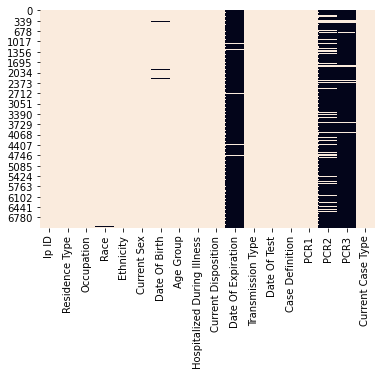

In [86]:
sns.heatmap(df_PCR.notnull(),cbar=False)

In [87]:
df_PCR.fillna({'PCR2':'Not done','PCR3':'Not done','Race':'Unknown',
               'Ethnicity':'Unknown', 'Current Sex':'Unknown','Occupation':'Unknown'},inplace=True)

In [89]:
df_PCR['Date Of Test']=pd.to_datetime(df_PCR['Date Of Test'])

df_PCR['PCR_TEST']=np.where((df_PCR['PCR1']=='Positive') | (df_PCR['PCR2']=='Positive')| (df_PCR['PCR3']=='Positive'),1,0)

### Daily cases for PCR positives

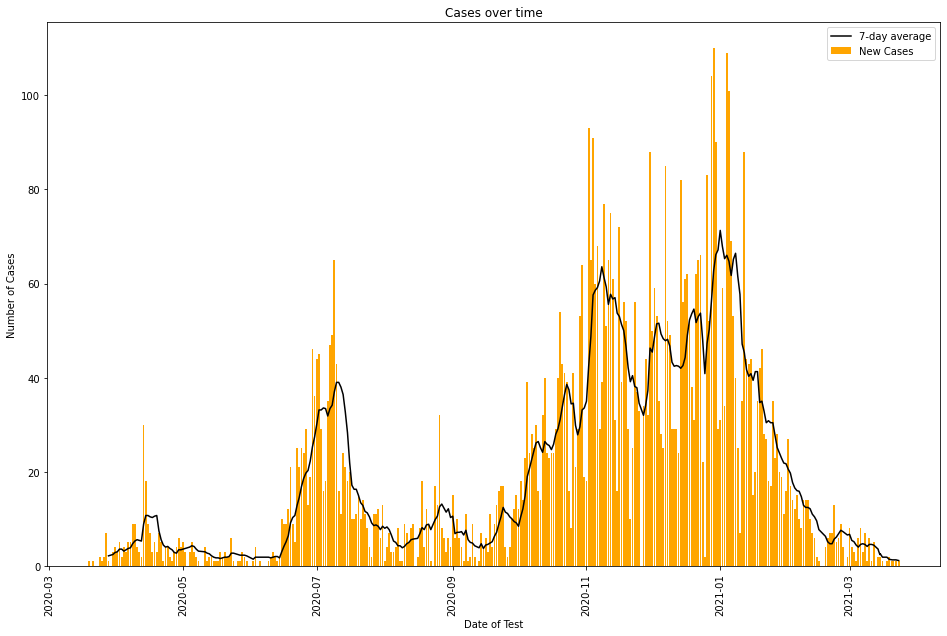

In [20]:
plt.figure(figsize=(16,10))
plt.bar(df_PCR['Date Of Test'],df_PCR.groupby('Date Of Test').PCR_TEST.cumsum(),color='orange')

plt.plot(df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum().index,
       df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum().rolling(window=7).mean(),color='black')
plt.legend(['7-day average','New Cases'])

plt.xlabel('Date of Test')
plt.ylabel('Number of Cases')
plt.title('Cases over time')
plt.xticks(rotation=90)
plt.show()

### Running totals for PCR positives

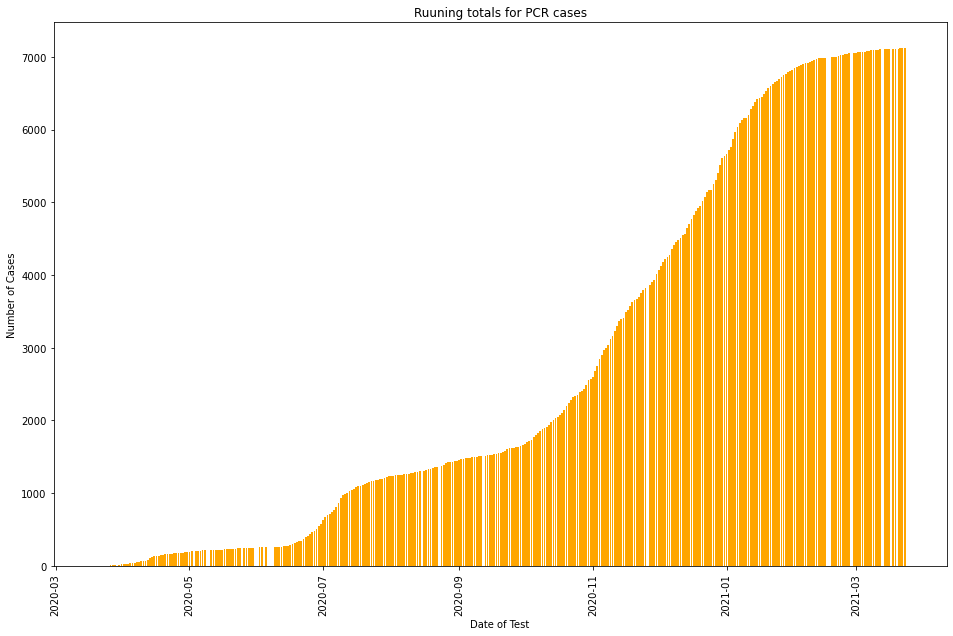

In [39]:
df_2=df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum()
df=df_2.to_frame(name='Test').reset_index()

plt.figure(figsize=(16,10))
plt.bar(df['Date Of Test'],df.Test.cumsum(),color='orange')
plt.xlabel('Date of Test')
plt.ylabel('Number of Cases')
plt.title('Ruuning totals for PCR cases')
plt.xticks(rotation=90)
plt.show()

### Summary

In [40]:
print('Cases     :',df_PCR[df_PCR['PCR_TEST']==1].PCR_TEST.count())

print('Recovered :',df_PCR[(df_PCR['Current Disposition']=='Unknown/Lost to followup') 
                         | (df_PCR['Current Disposition']=='Recovered') ]['Current Disposition'].count())

print('Active    :',df_PCR[(df_PCR['Current Disposition']=='Hospitalized') 
                         | (df_PCR['Current Disposition']=='Self-Isolated') ]['Current Disposition'].count())

print('Deaths    :',df_PCR[df_PCR['Current Disposition']=='Expired']['Current Disposition'].count())




Cases     : 7118
Recovered : 6864
Active    : 89
Deaths    : 165


### Cases by sex


### Cases by age group

In [41]:
df_PCR.dropna(subset=['Date Of Birth'],inplace=True)

df_PCR['Date Of Birth']=pd.to_datetime(df_PCR['Date Of Birth'])

df_PCR['AGE']=(df_PCR['Date Of Test']-df_PCR['Date Of Birth'])

df_PCR['AGE']=(df_PCR['Date Of Test']-df_PCR['Date Of Birth'])//timedelta(days=365.2422 )

In [42]:
condition=[(df_PCR['AGE']>=0)  & (df_PCR['AGE']<20),
           (df_PCR['AGE']>=20) & (df_PCR['AGE']<30),
           (df_PCR['AGE']>=30) & (df_PCR['AGE']<40),
           (df_PCR['AGE']>=40) & (df_PCR['AGE']<50),
           (df_PCR['AGE']>=50) & (df_PCR['AGE']<60),
           (df_PCR['AGE']>=60) & (df_PCR['AGE']<70),
           (df_PCR['AGE']>=70)]

values=['0-19','20-29','30-39','40-49','50-59','60-69','70+']

df_PCR['Age Category']=np.select(condition,values)

In [43]:
df_PCR.drop(df_PCR[df_PCR['Age Category']=='0'].index,inplace=True)

df_3=df_PCR['Age Category'].value_counts()

df4=pd.DataFrame(df_3).sort_index()

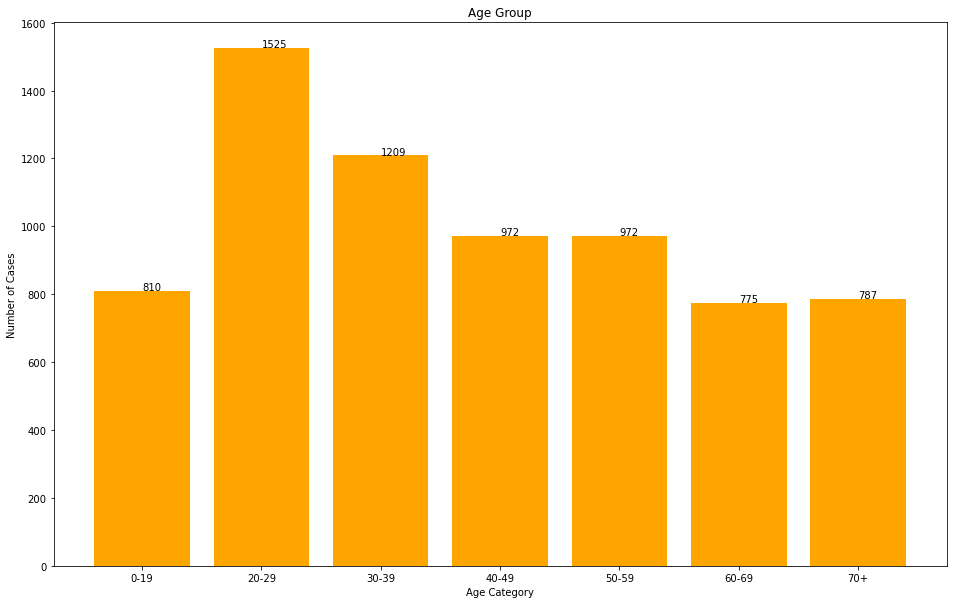

In [44]:
fig,ax=plt.subplots(figsize=(16,10))

ax.bar(df4['Age Category'].index,df4['Age Category'].values,color='orange')
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.title('Age Group')

for i,v in enumerate(df4['Age Category'].values):
    ax.text(i,v+2.5,str(v))

plt.show()

### Cases by school age group

In [45]:
condition_2=[(df_PCR['AGE']>=0)  & (df_PCR['AGE']<=4),
             (df_PCR['AGE']>4)  & (df_PCR['AGE']<=10),
             (df_PCR['AGE']>10) & (df_PCR['AGE']<=14),
             (df_PCR['AGE']>14) & (df_PCR['AGE']<20),
             (df_PCR['AGE']>=20)]

value_2=['Pre-K','Elementary','Middle School','High School','Not Valied']

df_PCR['School Age']=np.select(condition_2,value_2)

df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts()

High School      457
Middle School    183
Elementary        96
Pre-K             74
Name: School Age, dtype: int64

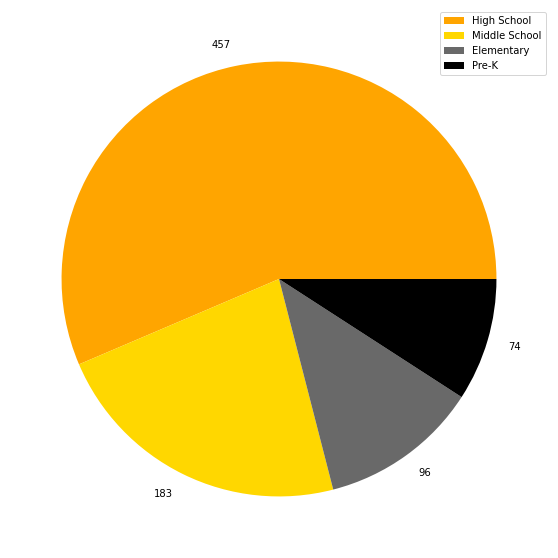

In [46]:
fig,ax=plt.subplots(figsize=(16,10))
colors = ["orange", "gold", "dimgray", "black"]

plt.pie(df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().values,
        labels=df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().values,colors=colors )    
plt.legend(labels=df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().index,loc=1)
plt.show()

### Count by occupation

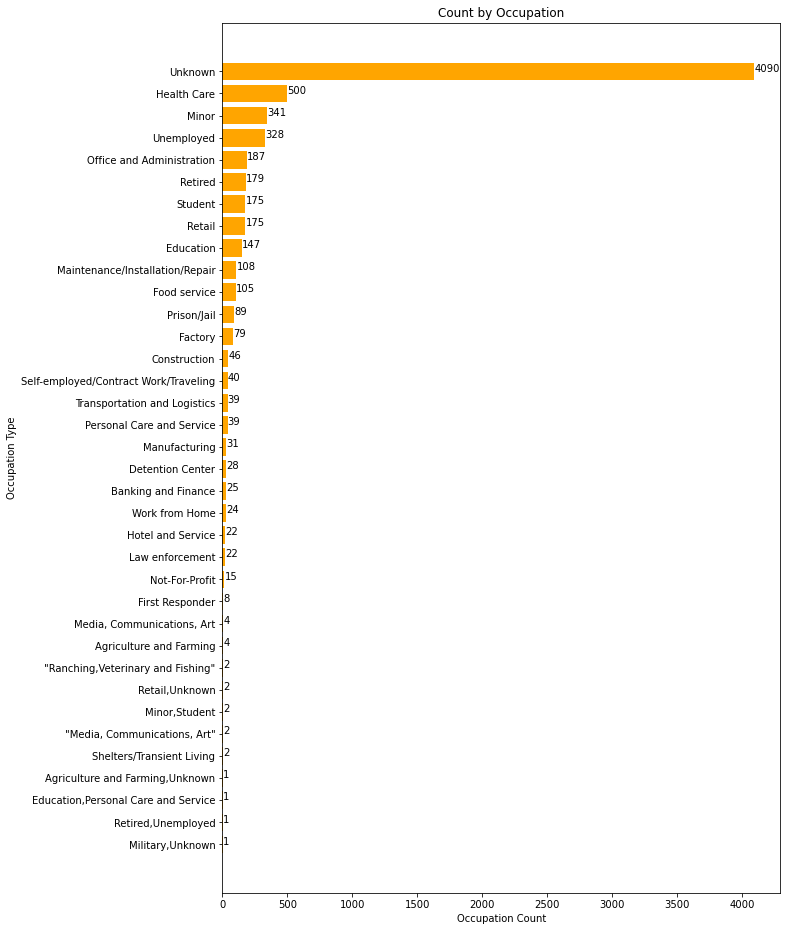

In [47]:
fig, ax =plt.subplots(figsize=(10,16))
plt.barh(df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values().index,
         df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values().values,
         color='orange')
plt.xlabel('Occupation Count')
plt.ylabel('Occupation Type')
plt.title('Count by Occupation')

for i,v in enumerate(df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values()):
    ax.text(v+1.5,i,str(v))
plt.show()

### Ethnicity by sex

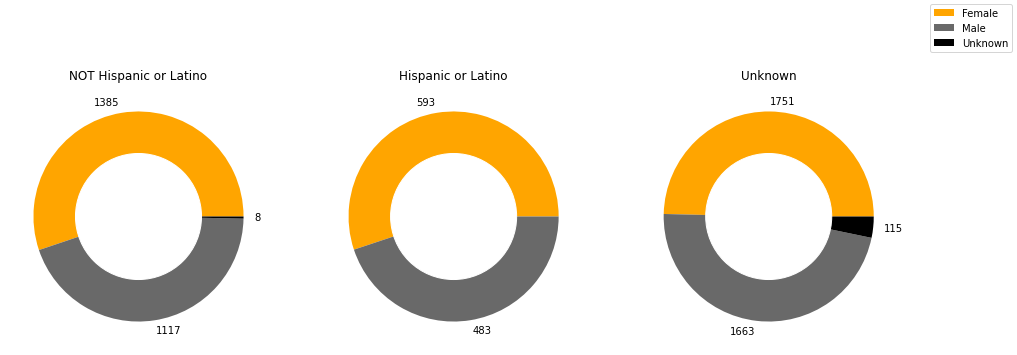

In [103]:
fig = plt.figure(figsize=(16,6))
colors=["orange", "dimgray",'black']


plt.subplot(1, 3, 1)
plt.pie(df_PCR[df_PCR['Ethnicity']=='NOT Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='NOT Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors)  

plt.title('NOT Hispanic or Latino')
center_circle_1=plt.Circle((0,0),0.6,color='w')
fig=plt.gcf()
fig.gca().add_artist(center_circle_1)

plt.subplot(1, 3, 2)
plt.pie(df_PCR[df_PCR['Ethnicity']=='Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors)  

plt.title('Hispanic or Latino')
center_circle_1=plt.Circle((0,0),0.6,color='w')
fig=plt.gcf()
fig.gca().add_artist(center_circle_1)


plt.subplot(1, 3, 3)
plt.pie(df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors) 

plt.title('Unknown')

center_circle_1=plt.Circle((0,0),0.6,color='w')

fig=plt.gcf()

fig.gca().add_artist(center_circle_1)

fig.legend(labels=df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().index,loc=1)

plt.show()